In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings


from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

In [3]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/Facebook_data.csv", sep=',')
data.shape  

(7050, 16)

In [4]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [7]:
data.dtypes

status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [8]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_published', 'status_id'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()                                 #encode the education column
label=le.fit_transform(data['status_type'])
label
data.drop('status_type',axis=1)
data['status_type']=label

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(data)
data_scaled = scaling.transform(data)


In [15]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

## Cluster Analysis

### Mini Batch K Mean

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import homogeneity_score

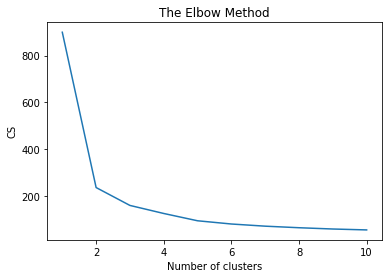

In [13]:
# Use elbow method to find optimal number of clusters

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [16]:

kMeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)
data_scaled["Cluster"] = kMeans.fit_predict(data_scaled)

In [17]:
labels_pred = data_scaled["Cluster"]

In [18]:
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.7175328526003868
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 0.20782499001961238
--------------------------------------------------------------


### Aglomarative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=2, linkage="ward")
data_scaled["Cluster"] = clustering_model.fit_predict(data_scaled)

In [22]:
score = silhouette_score(data_scaled, labels_pred, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.8174430532996064
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 0.20225050419825613
--------------------------------------------------------------


### DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
epsilon = 1.0
min_samples = 13

labels = DBSCAN(eps=epsilon, min_samples=min_samples).fit_predict(data_scaled)

In [24]:
score = silhouette_score(data_scaled, labels_pred, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.8174430532996064
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 0.20225050419825613
--------------------------------------------------------------


### OPTICS

In [25]:
from sklearn.cluster import OPTICS

labels = OPTICS(min_samples=3).fit_predict(data_scaled)

In [27]:
score = silhouette_score(data_scaled, labels, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.1379770242817293
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 0.20225050419825613
--------------------------------------------------------------


### MEAN SHIFT

In [28]:
from sklearn.cluster import MeanShift

labels = MeanShift().fit_predict(data_scaled)

In [29]:
score = silhouette_score(data_scaled, labels, metric='euclidean')
print("Silhouetter Score is:", score)
print("--------------------------------------------------------------")

db_index = davies_bouldin_score(data_scaled, data_scaled["Cluster"] )
print("DB Index (Davies-Bouldin index) is :", db_index)
print("--------------------------------------------------------------")

Silhouetter Score is: 0.7722396591763785
--------------------------------------------------------------
DB Index (Davies-Bouldin index) is : 0.20225050419825613
--------------------------------------------------------------
